In [2]:
# Import libraries and data
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


from src.utils.column_import import columns
s_x, s_y, v_x, v_y, a_x, a_y = columns


# Ballistic Integration

## Matrix creation

and same model 
but relative speed, position and acceleration

In [3]:
# Index shifting:
# k-1         k           k+1
# 0:-2         1:-1        2:

In [8]:
# Target vector y_a s(k+1)
y_a_x = s_x[2:]

y_a_y = s_y[2:]

# Target vector y_b v(k+1)
y_b_x = v_x[2:]
y_b_y = v_y[2:]

display(y_a_x.shape)
display(y_a_y.shape)
display(y_b_x.shape)
display(y_b_y.shape)


(205273,)

(205273,)

(205273,)

(205273,)

In [9]:
dt = 0.04

In [10]:
# s(k+1)
s_a_x_pred = s_x[1:-1] +  dt * v_x[1:-1] 
s_a_y_pred = s_y[1:-1] +  dt * v_y[1:-1] 

# v(k+1)
v_b_x_pred = v_x[1:-1] + dt* a_x[1:-1]
v_b_y_pred = v_y[1:-1] + dt* a_y[1:-1]

## Evaluation


In [11]:
def evaluate(y_test, y_pred):
    # Visualize the results

    plt.figure(figsize=(8, 4))
    # Evaluate the model using various metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the results in scientific notation
    print(f'Mean Squared Error (MSE): {mse:.4e}')
    print(f'Mean Absolute Error (MAE): {mae:.4e}')
    print(f'R-squared (R²) Score: {r2:.4e}')


    # Scatter plot of actual vs. predicted values with locus (line of identity)
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Locus
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    # Residual plot
    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

    plt.tight_layout()
    plt.show()
 

Mean Squared Error (MSE): 1.7433e+01
Mean Absolute Error (MAE): 1.7180e-01
R-squared (R²) Score: 9.9008e-01


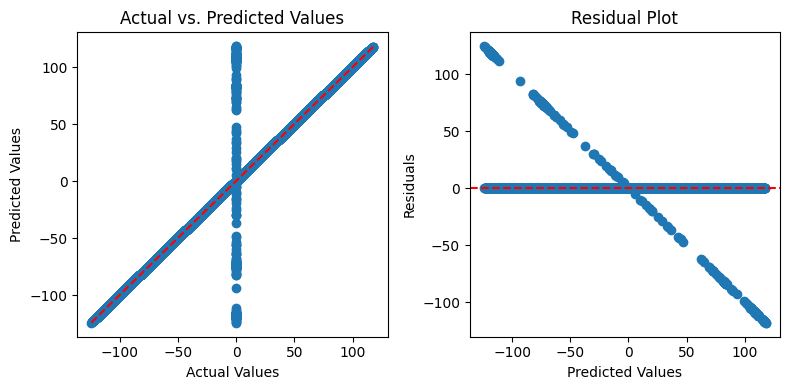

Mean Squared Error (MSE): 6.3662e+00
Mean Absolute Error (MAE): 1.0455e-01
R-squared (R²) Score: 9.9227e-01


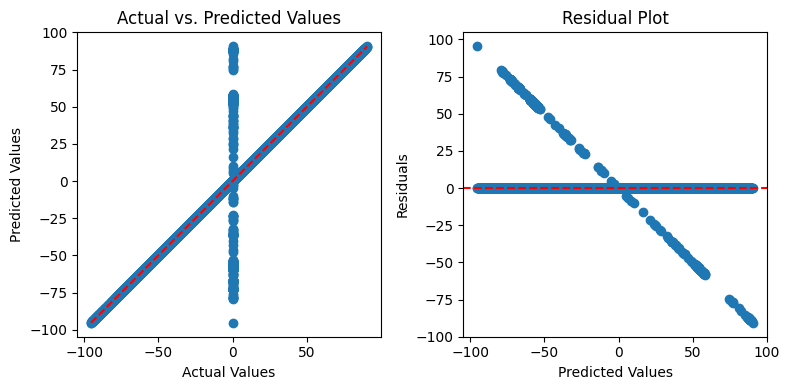

Mean Squared Error (MSE): 4.9257e-01
Mean Absolute Error (MAE): 2.4853e-02
R-squared (R²) Score: 9.9051e-01


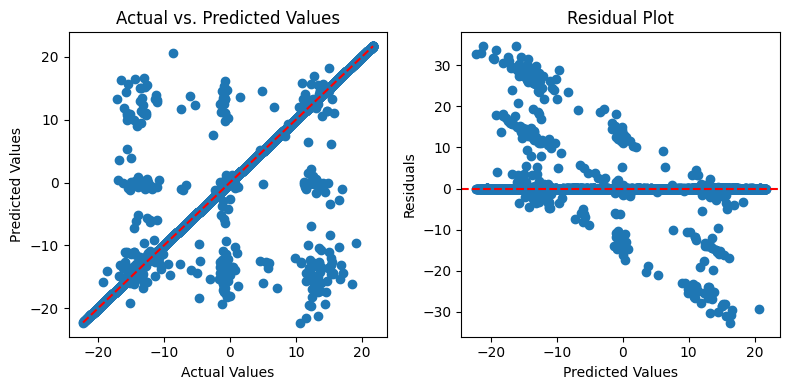

Mean Squared Error (MSE): 4.9257e-01
Mean Absolute Error (MAE): 2.4853e-02
R-squared (R²) Score: 9.9051e-01


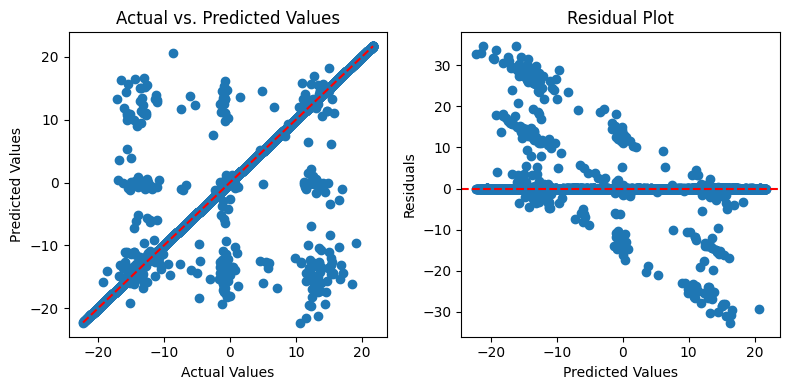

In [12]:
evaluate(y_a_x, s_a_x_pred)
evaluate(y_a_y, s_a_y_pred)
evaluate(y_b_x, v_b_x_pred)
evaluate(y_b_x, v_b_x_pred)